In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import mnist
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import tensorflow as tf
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import keras.backend as K
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential
from keras.layers import Conv2D,BatchNormalization,Dense,Flatten,Input,Activation,MaxPooling2D,GlobalAveragePooling2D,Reshape,Concatenate
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


[]


In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
xtrain1=xtrain.astype(np.float32)/255
xtest1=xtest.astype(np.float32)/255

In [4]:
xtrain1=xtrain1.reshape((-1,28,28,1))

In [5]:
dataset=dict([(str(i),[]) for i in range(10)])

In [6]:
ytrain1=to_categorical(ytrain,10)

In [7]:
for i in range(len(xtrain)):
    dataset[str(ytrain[i])].append(xtrain1[i])

In [8]:
lengths=[len(dataset[str(i)]) for i in range(10)]

In [9]:
np.random.choice([1,2,3,4,5,6],3,replace=False)

array([3, 2, 6])

In [10]:
a=[1,2,3,4,5]

In [11]:
a.remove(2)

In [12]:
lengths

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [13]:
a

[1, 3, 4, 5]

In [14]:
np.random.choice([1,2,3,4,5])

5

In [15]:
dataset['1'][0].shape

(28, 28, 1)

In [16]:
tripletdata=[]
for i in range(10000):
    a=[0,1,2,3,4,5,6,7,8,9]
    ind=np.random.choice([0,1,2,3,4,5,6,7,8,9])
    indx1=np.random.choice(np.arange(lengths[ind]))
    indx2=np.random.choice(np.arange(lengths[ind]))
    x1=dataset[str(ind)][indx1]
    x2=dataset[str(ind)][indx2]
    a.remove(ind)
    ind2=np.random.choice(a)
    
    indx3=np.random.choice(np.arange(lengths[ind2]))
    y1=dataset[str(ind2)][indx3]
    tripletdata.append([x1,x2,y1])

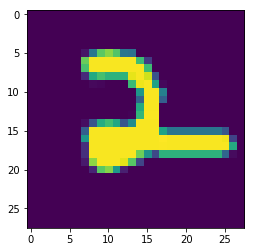

In [17]:
plt.imshow(tripletdata[1][0].reshape((28,28)))

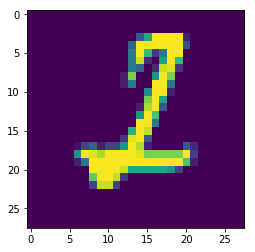

In [18]:
plt.imshow(tripletdata[1][1].reshape((28,28)))

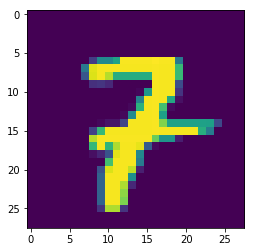

In [19]:
plt.imshow(tripletdata[1][2].reshape((28,28)))

In [20]:
inp=Input((28,28,1))
x=Conv2D(16,3,padding='same')(inp)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)
x=Conv2D(32,3,padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)
x=Conv2D(32,3,padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(32,3,padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=GlobalAveragePooling2D()(x)
x=Dense(16,activation='relu')(x)
out=Dense(10,activation='softmax')(x)


In [21]:
model=Model(inp,out)

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
__________

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(xtrain1[:5000],ytrain1[:5000],batch_size=64,epochs=5,validation_split=0.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 5s 1ms/step - loss: 1.8037 - acc: 0.4640 - val_loss: 1.6086 - val_acc: 0.4370
Epoch 2/5
4000/4000 [==============================] - 1s 177us/step - loss: 1.0224 - acc: 0.7458 - val_loss: 1.2170 - val_acc: 0.5310
Epoch 3/5
4000/4000 [==============================] - 1s 172us/step - loss: 0.5082 - acc: 0.9163 - val_loss: 0.4755 - val_acc: 0.8960
Epoch 4/5
4000/4000 [==============================] - 1s 171us/step - loss: 0.2383 - acc: 0.9637 - val_loss: 0.3990 - val_acc: 0.9030
Epoch 5/5
4000/4000 [==============================] - 1s 172us/step - loss: 0.1464 - acc: 0.9765 - val_loss: 0.2823 - val_acc: 0.9280


In [25]:
model.layers[-1].get_weights()[0]   # model weights

array([[-0.58510643,  0.08506473, -0.39898723, -0.07019152, -0.02011337,
        -0.3769452 , -0.36046678, -0.30580726,  0.07750731,  0.40425053],
       [-0.2975891 , -0.6244648 ,  0.21431617, -0.274857  ,  0.33643386,
        -0.17935404, -0.06677885,  0.48359764,  0.01226687, -0.35018566],
       [ 0.4167366 ,  0.22700527,  0.41017124, -0.21805352,  0.0043873 ,
        -0.0942171 , -0.15973647,  0.4024912 ,  0.32955325,  0.36190373],
       [-0.1604989 , -0.46107107,  0.39224815, -0.06254844, -0.05307638,
         0.28177103,  0.10727542, -0.44351545, -0.48462263, -0.10546289],
       [-0.41072005, -0.09174653, -0.41682163, -0.25913632,  0.52658165,
         0.32181382,  0.07720537, -0.03740216,  0.35757098, -0.02018155],
       [ 0.16820791, -0.24974209,  0.13022725,  0.28708023, -0.6863692 ,
        -0.40477464, -0.1386901 , -0.5836272 ,  0.58481884, -0.30093983],
       [ 0.3823462 , -0.31958374, -0.34825012,  0.3521361 ,  0.02090774,
        -0.4522598 ,  0.10409374, -0.33337408

In [26]:
model.layers[-1].get_weights()[1]  # biases

array([ 0.02400628,  0.04338355, -0.0900005 , -0.10409346,  0.17025246,
        0.14459682, -0.15639468, -0.05049065, -0.05711721,  0.07328018],
      dtype=float32)

In [27]:
from sklearn.manifold import TSNE


In [28]:
tsne=TSNE(n_components=2,perplexity=30,n_iter=1500)

In [29]:
model1=Sequential()
for i in model.layers[:-1]:
    model1.add(i)

In [30]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
__________

In [31]:
encodings=model1.predict(xtrain1[:5000])

In [32]:
encode=tsne.fit_transform(encodings)

In [33]:
data1=np.hstack([encode,ytrain[:5000].reshape((-1,1))])

In [34]:
df=pd.DataFrame(data1,columns=['a','b','label'])

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


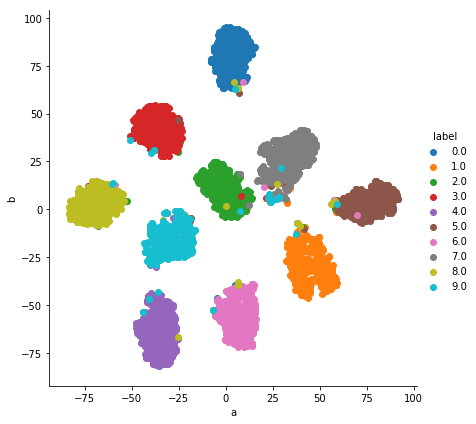

In [35]:
import seaborn as sn
sn.FacetGrid(df, hue="label", size=6).map(plt.scatter, 'a', 'b').add_legend()
plt.show()

In [36]:
#Above step extract layers with weights from previously trained model
# above step can be used to extract the outsputs from middle layer of the pretrained CNN network . it is a really important technique


In [37]:
input1=Input((28,28,1))
x=Conv2D(16,3,padding='same')(input1)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)
x=Conv2D(32,3,padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)
x=Conv2D(32,3,padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(32,3,padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=GlobalAveragePooling2D()(x)
outg=Dense(16,activation='relu')(x)



In [38]:
TripletModel=Model(input1,outg)

In [39]:
TripletModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 32)        128       
__________

In [40]:
inp1=Input((28,28,1))
inp2=Input((28,28,1))
inp3=Input((28,28,1))


In [41]:
out1=TripletModel(inp1)
out2=TripletModel(inp2)
out3=TripletModel(inp3)

In [42]:
out=Concatenate()([out1,out2,out3])

In [43]:
CompModel=Model([inp1,inp2,inp3],out)

In [44]:
CompModel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 16)           24272       input_3[0][0]                    
                                                                 input_4[0][0]                    
          

In [45]:
def triplet_loss(ytrue,ypred):  #Very cool way to Implement loss 
    anc=ypred[:,:16]
    pos=ypred[:,16:32]
    neg=ypred[:,32:48]
    
    posdist=K.sum(K.square(anc-pos),axis=-1,keepdims=True)
    negdist=K.sum(K.square(anc-neg),axis=-1,keepdims=True)
    alpha=0.4
    basicloss=posdist-negdist+alpha
    loss=K.maximum(basicloss,0)
    return loss

In [46]:
CompModel.compile(optimizer='adam',loss=triplet_loss)

In [47]:
data1=[tripletdata[i][0] for i in range(len(tripletdata[:5000]))]
data2=[tripletdata[i][1] for i in range(len(tripletdata[:5000]))]
data3=[tripletdata[i][2] for i in range(len(tripletdata[:5000]))]

In [48]:
CompModel.fit([data1,data2,data3],y=np.ones((5000,1)),epochs=5,batch_size=64,verbose=1)  # y=ones is just a dummy labelled data

Epoch 1/5
5000/5000 [==============================] - 3s 662us/step - loss: 0.1626
Epoch 2/5
5000/5000 [==============================] - 1s 285us/step - loss: 0.0527
Epoch 3/5
5000/5000 [==============================] - 1s 286us/step - loss: 0.0274
Epoch 4/5
5000/5000 [==============================] - 1s 286us/step - loss: 0.0174
Epoch 5/5
5000/5000 [==============================] - 1s 286us/step - loss: 0.0116


In [49]:
# https://towardsdatascience.com/lossless-triplet-loss-7e932f990b24

In [50]:
encode2=TripletModel.predict(xtrain1[:5000])

In [51]:
encode2.shape

(5000, 16)

In [52]:
tsne1=TSNE(n_components=2,perplexity=30,n_iter=1500)
data2=tsne1.fit_transform(encode2)

In [53]:
data3=np.hstack([data2,ytrain[:5000].reshape((-1,1))])

In [54]:
df1=pd.DataFrame(data3,columns=['a','b','label'])

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


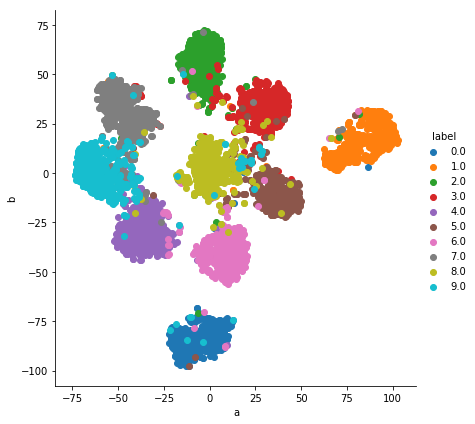

In [55]:
import seaborn as sn
sn.FacetGrid(df1, hue="label", size=6).map(plt.scatter, 'a', 'b').add_legend()
plt.show()